# 🧠 K-Means Clustering + Pseudo-Labeling for Semi-Supervised Learning

## 📌 Objective:
This notebook demonstrates how to use K-Means clustering for:
- Unsupervised clustering of data
- Creating pseudo-labels for unlabeled data
- Using pseudo-labels to train a supervised model
- Fine-tuning the model using real labels
- 



In [273]:
# 📦 Import essential libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


##  Data Generation (Simulating Unlabeled Data)

In [274]:
# Simulated unlabeled data
X, true_labels = make_blobs(n_samples=300, centers=3, cluster_std=1.0, random_state=42)

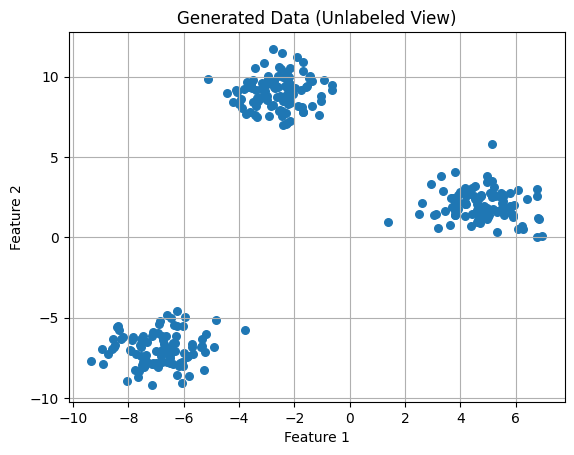

In [275]:
# Visualizing the raw data
plt.scatter(X[:, 0], X[:, 1], s=30)
plt.title("Generated Data (Unlabeled View)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.grid(True)
plt.show()

# Pseudo-labeling with Clustering (Semi-supervised Learning)

## Split Data to Simulate Limited Labels

In [276]:
X_train, X_test, y_train, y_test = train_test_split(X, true_labels, test_size=0.2, random_state=42)

In [277]:
# For this semi-supervised learning task, we would be using the x train for clustering to derive its pseudo labels which then would be used for pre training our model

----
Carrying out cross validation to see which cluster is the best even after they individually carried out random initialization per cluster we need to still based of the best WCSS (cost function) using the elbow method

----

In [278]:
# trying to find the right cluster number

class My_Cluster:

    inertias = []
    
    def __init__ (self, X):
        self.X = X
        

    def model (self):

        for i in range(1,11): # for the number of clusters
            Kmeans_model = KMeans(
            n_clusters=i,
            init='k-means++',
            n_init='auto',
            max_iter=300,
            tol=0.0001, # like a stopper
            verbose=0,
            random_state=42,
            copy_x=True,
            algorithm='lloyd',)

            Kmeans_model.fit(self.X) # unsupervised training
            My_Cluster.inertias.append(Kmeans_model)
        
        return My_Cluster.inertias

In [279]:
my_instance=My_Cluster(X_train)

In [280]:
my_instance

In [281]:
model_load = my_instance.model()

In [282]:
model_load

[KMeans(n_clusters=1, n_init='auto', random_state=42),
 KMeans(n_clusters=2, n_init='auto', random_state=42),
 KMeans(n_clusters=3, n_init='auto', random_state=42),
 KMeans(n_clusters=4, n_init='auto', random_state=42),
 KMeans(n_clusters=5, n_init='auto', random_state=42),
 KMeans(n_clusters=6, n_init='auto', random_state=42),
 KMeans(n_clusters=7, n_init='auto', random_state=42),
 KMeans(n_init='auto', random_state=42),
 KMeans(n_clusters=9, n_init='auto', random_state=42),
 KMeans(n_clusters=10, n_init='auto', random_state=42)]

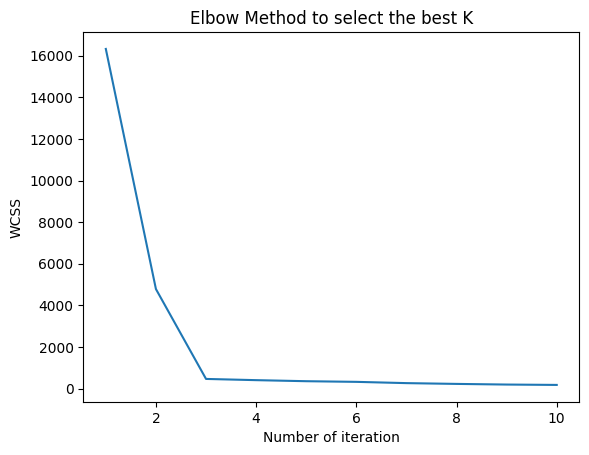

In [283]:
plt.plot(range(1,11),[i.inertia_ for i in model_load])
plt.xlabel('Number of iteration')
plt.ylabel('WCSS')
plt.title('Elbow Method to select the best K')
plt.show()

In [284]:
# from the graph the most appropriate cluster to use is k = 3

In [285]:
# now lets predict, so fit predict :)

# Clustering with KMeans

In [286]:
Kmeans = KMeans(
            n_clusters=3,
            init='k-means++',
            n_init='auto',
            max_iter=300,
            tol=0.0001, # like a stopper
            verbose=0,
            random_state=42,
            copy_x=True,
            algorithm='lloyd',)

In [287]:
my_pseudo_labels= Kmeans.fit_predict(X_train)

In [288]:
# so now you have your pseudo labels. lets now proceed into pretraining our model

In [289]:
my_model = LogisticRegression(
    penalty='l2',
    dual=False,
    tol=0.0001,
    C=1.0,
    fit_intercept=True,
    intercept_scaling=1,
    class_weight=None,
    random_state=None,
    solver='lbfgs',
    max_iter=100,
    multi_class='auto',
    verbose=0,
    warm_start=False,
    n_jobs=None,
    l1_ratio=None,
)

## This is where Semi-Supervised Algorithm comes in :)

In [290]:
# pretraining the model to extract pattern from the clusters and its labels
my_model.fit(X_train,my_pseudo_labels)

LogisticRegression()

## Resplitting again to get the fine tuning set and evaluation set from the existing test

In [291]:
X_ft, X_eval, y_ft, y_eval = train_test_split(X_test, y_test, test_size=0.2, random_state=42)

## Fine-Tuning Using True Labels

In [292]:
# fine tuning the model

my_model.fit(X_ft,y_ft)

LogisticRegression()

In [293]:
# lets predict off the test_eval set
pred_eval = my_model.predict(X_eval)
pred_eval

array([1, 2, 1, 2, 0, 0, 0, 0, 0, 2, 1, 2])

In [294]:
# final evaluation
print("Final Accuracy (vs true labels):", accuracy_score(pred_eval, y_eval))

Final Accuracy (vs true labels): 1.0


## ✅ Conclusions:
- KMeans successfully grouped data points into clusters without needing labels.
- These pseudo-labels were used to bootstrap a supervised model.
- Fine-tuning on real labels improved performance — showing the value of semi-supervised learning.
- This approach simulates real-world scenarios where only a small portion of the data is labeled.
- We used KMeans to simulate pseudo-labels and applied them in a semi-supervised learning context.
- While clustering gave a decent approximation, true label fine-tuning remains essential for real-world deployment. Next steps may involve using better clustering (e.g., DBSCAN) or combining with active learning.

